# Temperatura externa y consumo de energía

Se modelará el consumo de energía de un edicifio a partir de la temperatura externa (_Outdoor Air Temperature (OAT)_) y otra información (ej. la hora del día) como variables predictivas en un algoritmo de regresión lineal.

In [2]:
#---  Librerías ---#
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from scipy import stats

from sklearn.model_selection import train_test_split
import glob

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

## 1. Importar y organizar datos

Se utilizará el dataset correspondiente a _Long-term energy consumption & outdoor air temperature for 11 commercial buildings_ disponible en [OpenEI](https://openei.org/datasets/dataset/649aa6d3-2832-4978-bc6e-fa563568398e).

Solo se toman los 5 edificios cuyo set de datos está en estado _retail_ y, se une toda la información en un solo DataFrame.

In [6]:
#--- importamos los archivos ---#

all_files = glob.glob('building_data/*.csv')

li = []

for file in all_files:
    #importamos usando la fecha como indice
    df = pd.read_csv(file, index_col=[0], parse_dates=True)
    li.append(df)

In [22]:
li[0].tail(10)

,OAT (F),Power (kW)
Timestamp,,
2010-12-30 21:45:00,48,284.1
2010-12-30 22:00:00,48,273.4
2010-12-30 22:15:00,48,196.7
2010-12-30 22:30:00,48,185.0
2010-12-30 22:45:00,48,163.1
2010-12-30 23:00:00,48,165.1
2010-12-30 23:15:00,48,157.6
2010-12-30 23:30:00,48,166.8
2010-12-30 23:45:00,48,164.0


In [14]:
li[0].shape

(34940, 2)

In [8]:
#--- concatenamos toda la información ---#
data = pd.concat(li, axis=0)

In [21]:
data.tail(10)

,OAT (F),Power (kW)
Timestamp,,
2010-12-30 21:45:00,36,281.6
2010-12-30 22:00:00,36,284.9
2010-12-30 22:15:00,37,276.4
2010-12-30 22:30:00,37,268.7
2010-12-30 22:45:00,37,268.3
2010-12-30 23:00:00,37,266.1
2010-12-30 23:15:00,35,233.8
2010-12-30 23:30:00,35,232.2
2010-12-30 23:45:00,35,192.4


In [15]:
data.shape

(174700, 2)

Notemos entonces que la fuente de datos es pública, por lo cual __no hay conflictos de intereses__ a la hora de analizar estos datos. __No se requiere ningún permiso especial para el acceso, manipulación y discusión de resultados del presente notebook__. 

## 2. Exploración de los datos

Se realizará una indagación sobre la información obtenida y se buscará la mejor forma de limpiar el dataset disponible.

- Revisamos si hay valores faltantes.

In [29]:
data.isnull().values.any()

False

- Hacemos un primer gráfico para ver como son los datos 

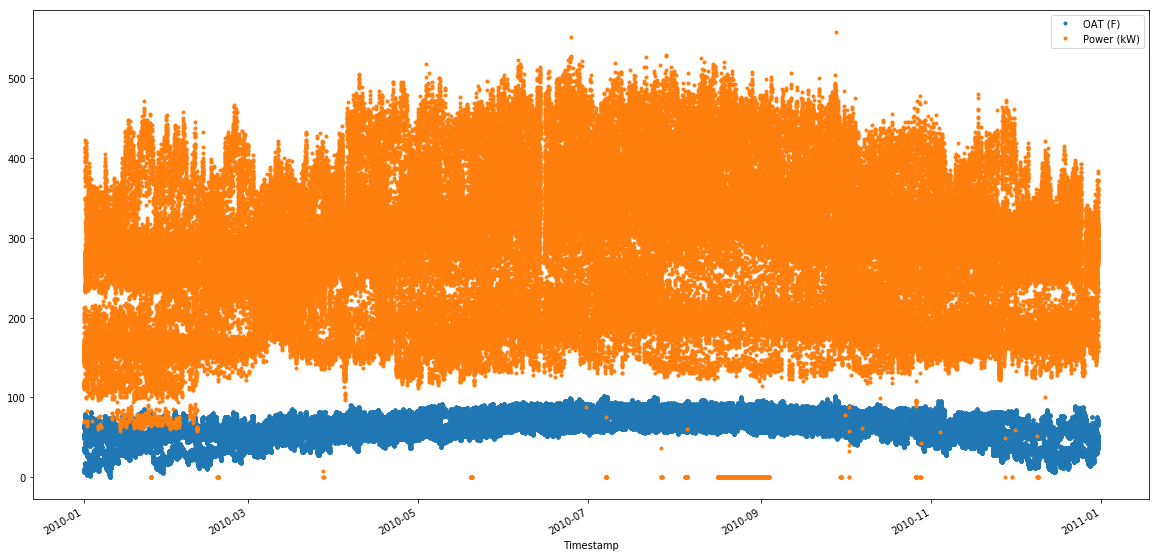

In [26]:
data.plot(figsize=(20,10), style='.')

- Hacemos un segundo gráfico para ver si hay un comportamiento estadistico claro, por ejemplo, una distribución gaussiana para los valores numéricos. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe86ed9ac50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe86ec40668>]], dtype=object)

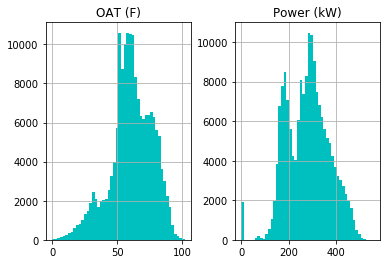

In [31]:
data.hist(color="c", bins=50)

De estos histograas podemos notar que, al juntar la infomación de varios edificios hay dos "picos" para el consumo de energía (Power kW). Mientras que, la temperatura externa OAT se mantiene con un comportamiento gaussiano de un solo pico muy marcado. 

Para contextualizar un poco estos comportamientos usaremos un _Box Plot_.


- Realizamos un gráfico de caja (Box Plot)


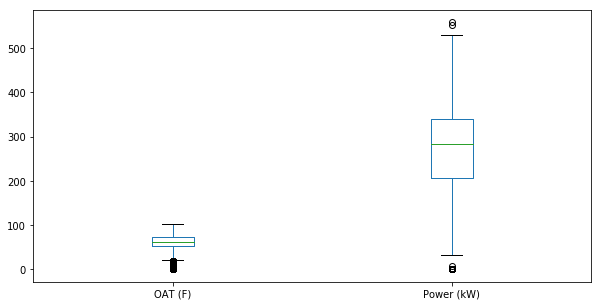

In [32]:
data.plot(kind='box', figsize=(10,5))